# Project 2: Low-Pass and High-Pass Filters

[https://github.com/meterglost/HCMUT-CO3057-DigitalImageProcessing-ComputerVision](https://github.com/meterglost/HCMUT-CO3057-DigitalImageProcessing-ComputerVision/tree/main/project/project2.ipynb)

## Setup

In [38]:
%pip install --quiet opencv-python-headless numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2 as cv
import numpy as np
from IPython.display import display, Image

## Sample image

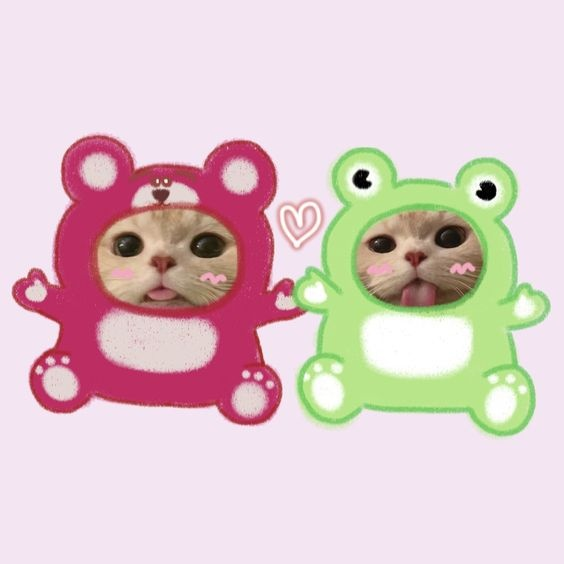

In [3]:
img = cv.imread("../sample/cat.jpg")
display(Image(cv.imencode('.jpg', img)[1].tobytes(), width=200))

## Low-Pass Filter

In [4]:
kernel_size = 5

### Averaging

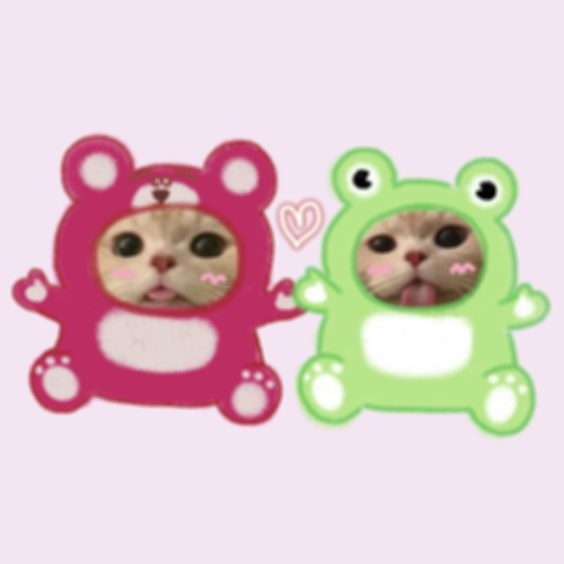

In [5]:
kernel = np.ones((kernel_size, kernel_size), np.float32) / pow(kernel_size, 2)
img_lpf = cv.filter2D(img, -1, kernel)

display(Image(cv.imencode('.jpg', img_lpf)[1].tobytes(), width=200))

### Median

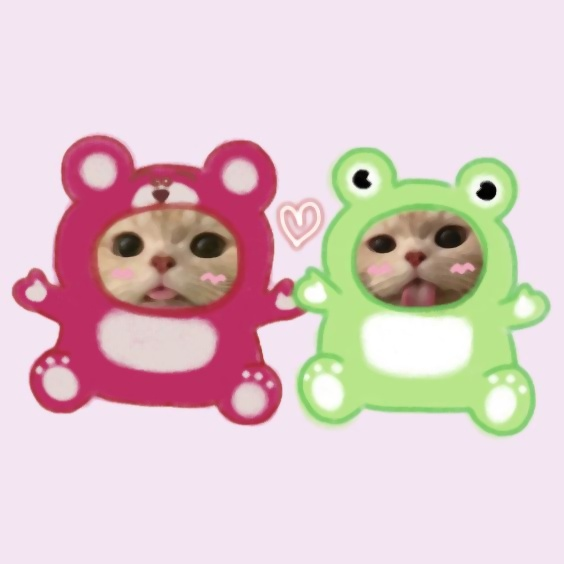

In [6]:
img_lpf = cv.medianBlur(img, kernel_size)
display(Image(cv.imencode('.jpg', img_lpf)[1].tobytes(), width=200))

### Gaussian

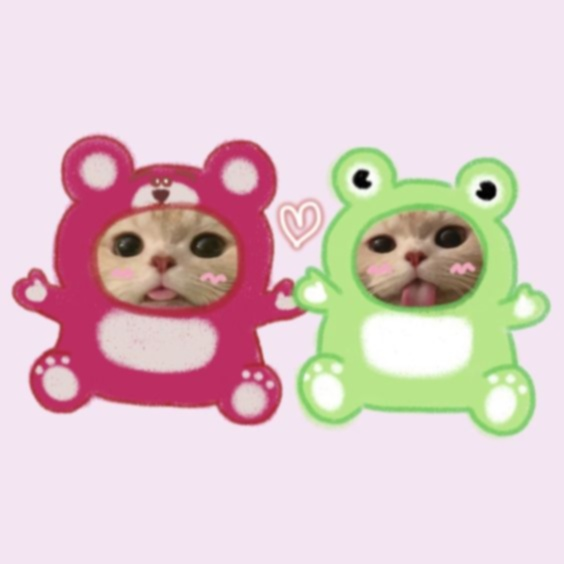

In [10]:
kernel_1D = cv.getGaussianKernel(kernel_size, 0)
kernel = np.outer(kernel_1D, kernel_1D)
img_lpf = cv.filter2D(img, -1, kernel)
display(Image(cv.imencode('.jpg', img_lpf)[1].tobytes(), width=200))

Instead of using simple mean, Gaussian blur uses weighted mean, where closer pixels contribute more weight, so that it usually keep the detail while removing noise better than the average blue.

## High-Pass Filter

In [11]:
kernel_size = 5

### Based on Gaussian blur

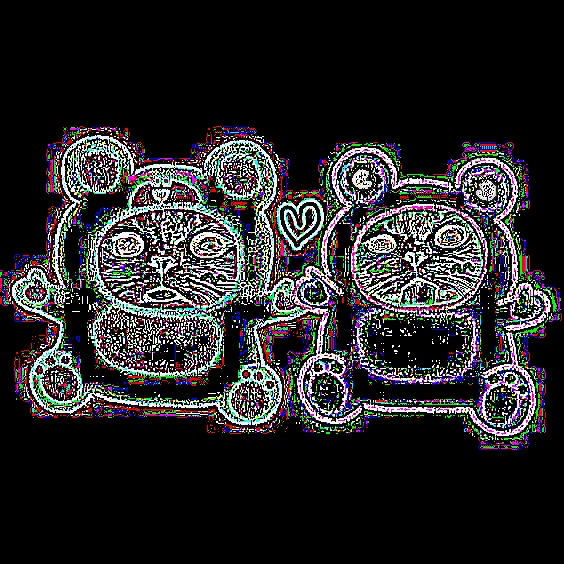

In [12]:
kernel_1D = cv.getGaussianKernel(kernel_size, 0)
kernel = np.outer(kernel_1D, kernel_1D)
img_lpf = cv.filter2D(img, -1, kernel)
img_hpf = img - img_lpf
display(Image(cv.imencode('.jpg', img_hpf)[1].tobytes(), width=200))

### Sobel

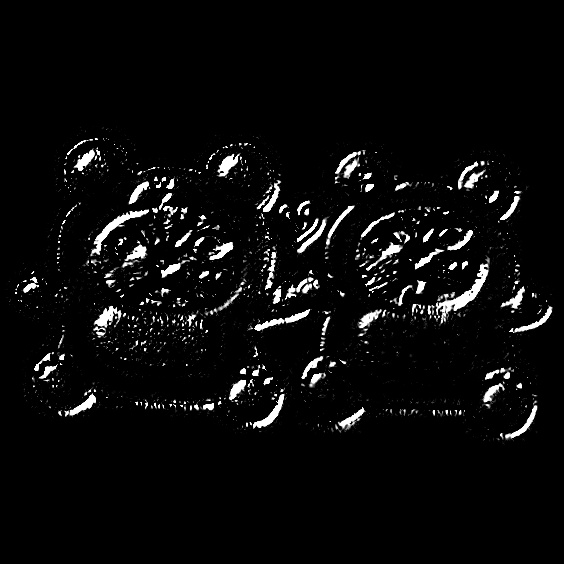

In [13]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
sobelx = cv.Sobel(gray, -1, 1, 0, ksize=kernel_size)
sobely = cv.Sobel(gray, -1, 0, 1, ksize=kernel_size)
img_hpf = cv.bitwise_and(sobelx, sobely)
display(Image(cv.imencode('.jpg', img_hpf)[1].tobytes(), width=200))

### Laplacian

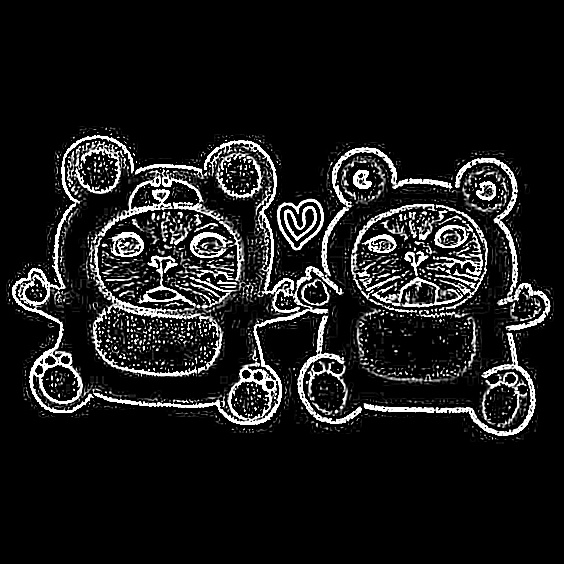

In [14]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_hpf = cv.Laplacian(gray, -1, ksize=kernel_size)
display(Image(cv.imencode('.jpg', img_hpf)[1].tobytes(), width=200))

## Conclusion

- Low-Pass Filter removes high frequecy content from the image, so it is useful for removing noise, bakground, ...
- High-Pass Filter conversely ideal for sharpening image, edge detection, texture enhancement, ...